In [146]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

%matplotlib inline

## Examine customer and transaction data

### data loading

In [147]:
pur_bhvr = pd.read_csv("QVI_purchase_behaviour.csv")
pur_bhvr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [148]:
pur_bhvr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [149]:
tran_data = pd.read_excel("QVI_transaction_data.xlsx")
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [150]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### data cleaning

In [151]:
#converting mulitple columns to object
for col in ['STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR']:
    tran_data[col]=tran_data[col].astype('object')
    
for col in ['LIFESTAGE','PREMIUM_CUSTOMER']:
    pur_bhvr[col]=pur_bhvr[col].astype('category')

In [152]:
#transformating date column
tran_data['DATE']=pd.TimedeltaIndex(tran_data['DATE'], unit='d')+dt.datetime(1899,12,30)
tran_data['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [153]:
#adding day of week column 
tran_data['DAY']=tran_data['DATE'].map(lambda x: x.strftime("%a"))
tran_data['DAY']

0         Wed
1         Tue
2         Mon
3         Fri
4         Sat
         ... 
264831    Sat
264832    Mon
264833    Tue
264834    Thu
264835    Sat
Name: DAY, Length: 264836, dtype: object

In [154]:
#removing unrelated data (are not chip)in product name column
tran_data['PROD_NAME'].map(lambda x: 'chip' in x.lower())

0          True
1         False
2          True
3          True
4         False
          ...  
264831    False
264832    False
264833    False
264834     True
264835    False
Name: PROD_NAME, Length: 264836, dtype: bool

In [155]:
tran_data.drop(tran_data[tran_data['PROD_NAME'].map(lambda x: 'chip' in x.lower())].index,inplace=True)

In [156]:
#removing anomalies in product quantity column
tran_data["PROD_QTY"].describe()

count    190266.000000
mean          1.908502
std           0.728262
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [157]:
tran_data[tran_data['PROD_QTY']>5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Sun
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Mon


In [158]:
tran_data.drop(labels=tran_data[tran_data["PROD_QTY"]==200].index,inplace=True)

In [159]:
#adding product brand name column 
tran_data['PROD_BRAND']=tran_data['PROD_NAME'].str.split().str[0]
sorted(tran_data['PROD_BRAND'].unique())

['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Dorito',
 'Doritos',
 'Grain',
 'GrnWves',
 'Infuzions',
 'Infzns',
 'Kettle',
 'NCC',
 'Old',
 'Pringles',
 'RRD',
 'Red',
 'Smith',
 'Smiths',
 'Snbts',
 'Sunbites',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'WW',
 'Woolworths']

In [160]:
tran_data.replace({'Dorito':'Doritos',
              'Grain':'GrnWves',
              'Infzns':'Infuzions',
              'NCC':'Natural',
              'Red':'RRD',
              'Smith':'Smiths',
              'Snbts':'Sunbites',
              'WW':'Woolworths'},inplace=True)
sorted(tran_data['PROD_BRAND'].unique())

['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Doritos',
 'GrnWves',
 'Infuzions',
 'Kettle',
 'Natural',
 'Old',
 'Pringles',
 'RRD',
 'Smiths',
 'Sunbites',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'Woolworths']

In [161]:
#adding product size column 
tran_data['PROD_SIZE']=tran_data['PROD_NAME'].str.extract(r'(\d+[gG]+)',expand=True)
tran_data['PROD_SIZE']

1         175g
4         150g
5         300g
7         210g
9         210G
          ... 
264829    110g
264831    175g
264832    175g
264833    170g
264835    175g
Name: PROD_SIZE, Length: 190264, dtype: object

In [279]:
#adding product 
tran_data['PROD_PRICE'] = tran_data['TOT_SALES']/tran_data['PROD_QTY']
tran_data['PROD_PRICE']

1         2.1
4         4.6
5         5.1
7         3.6
9         3.6
         ... 
264829    3.8
264831    5.4
264832    4.4
264833    4.4
264835    4.4
Name: PROD_PRICE, Length: 190264, dtype: float64

## Merge customer and transaction and customer data together 

In [280]:
data=pd.merge(pur_bhvr,tran_data,how='inner',on='LYLTY_CARD_NBR')
data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_BRAND,PROD_SIZE,PROD_PRICE
0,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Sun,RRD,150g,2.7
1,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Thu,GrnWves,210G,3.6
2,1005,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,Fri,Cheetos,165g,2.8
3,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,Tue,Infuzions,110g,3.8
4,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,Wed,RRD,150g,2.7
5,1009,NEW FAMILIES,Premium,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,Tue,Doritos,330g,5.7
6,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,Sun,Doritos,170g,4.4
7,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-12-14,1,11,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,Fri,Old,300g,5.1
8,1011,OLDER SINGLES/COUPLES,Mainstream,2018-07-29,1,12,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,Sun,GrnWves,180g,3.1
9,1011,OLDER SINGLES/COUPLES,Mainstream,2018-11-08,1,13,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,Thu,Old,300g,5.1


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190264 entries, 0 to 190263
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    190264 non-null  int64         
 1   LIFESTAGE         190264 non-null  category      
 2   PREMIUM_CUSTOMER  190264 non-null  category      
 3   DATE              190264 non-null  datetime64[ns]
 4   STORE_NBR         190264 non-null  int64         
 5   TXN_ID            190264 non-null  int64         
 6   PROD_NBR          190264 non-null  int64         
 7   PROD_NAME         190264 non-null  object        
 8   PROD_QTY          190264 non-null  int64         
 9   TOT_SALES         190264 non-null  float64       
 10  DAY               190264 non-null  object        
 11  PROD_BRAND        190264 non-null  object        
 12  PROD_SIZE         190264 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), ob

## Exploratory data analysis and visualization 

### By date

Text(0.5, 1.0, 'Number of transcations throughout the year')

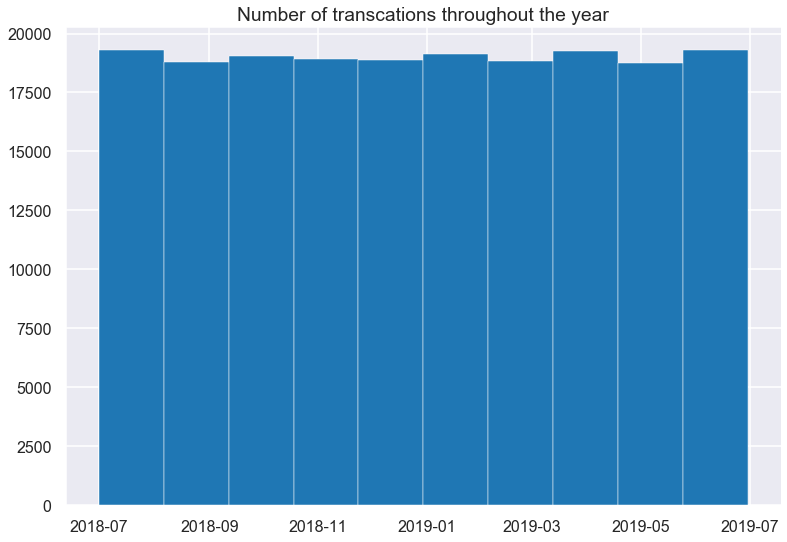

In [275]:
style.use('seaborn-poster')
sns.set_style('darkgrid')
data['DATE'].hist()
plt.title("Number of transcations throughout the year")

**The transcations throughout the year are arond the same**

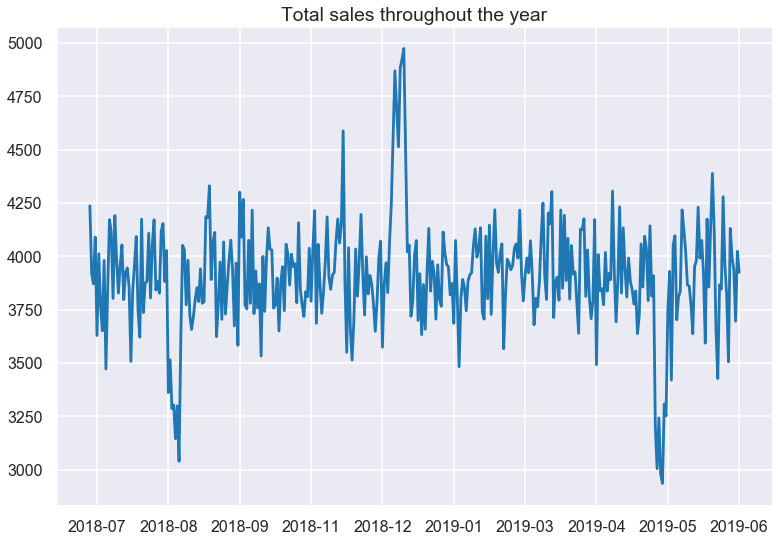

In [175]:
import matplotlib.dates as mdates
fig,ax =plt.subplots()
ax.plot(data['TOT_SALES'].groupby(data['DATE']).sum())
plt.title('Total sales throughout the year')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

**There is a sale peak in December 2018**

Text(0.5, 1.0, 'Total sales in December 2020')

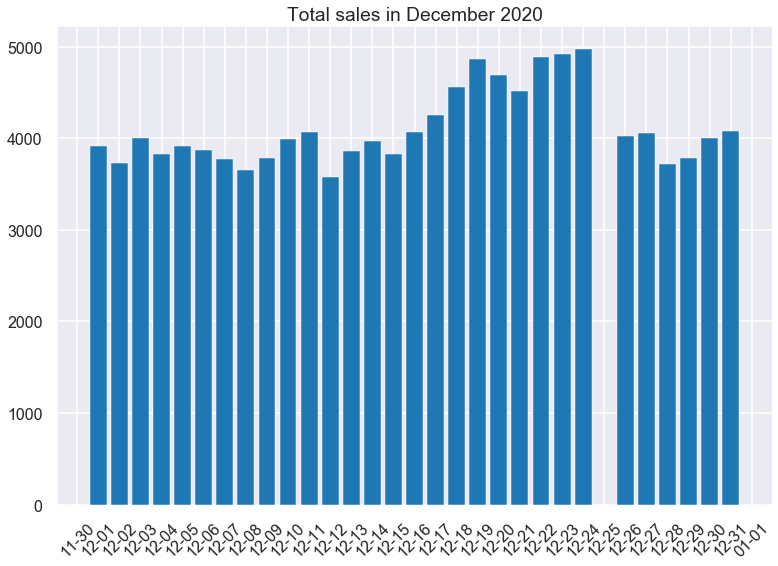

In [313]:
fig,ax =plt.subplots()
ax.bar(data[data['DATE'].dt.month==12]['TOT_SALES'].groupby(data['DATE']).sum().reset_index()['DATE'],data[data['DATE'].dt.month==12]['TOT_SALES'].groupby(data['DATE']).sum())
ax.xaxis.set_major_locator(plt.MaxNLocator(34))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)
plt.title('Total sales in December 2020')

**The best salses happened right before Christmas
<br>There is no sale on Christams day because the store is closed**

Text(0.5, 1.0, 'Total sales by day of the week')

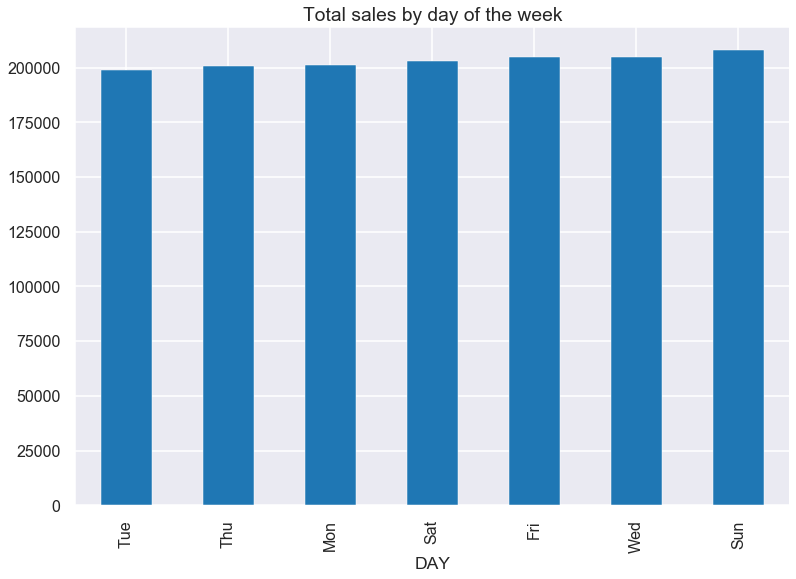

In [198]:
data['TOT_SALES'].groupby(data['DAY']).sum().sort_values().plot(kind='bar')
plt.title('Total sales by day of the week')

**During the week, Sunday sells the best**

### By product size

Text(0.5, 1.0, 'Number of transactions by product size')

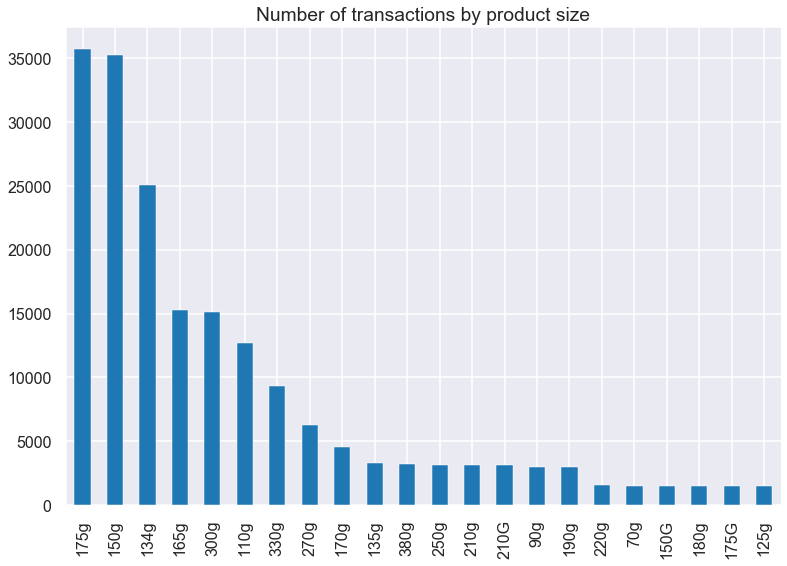

In [276]:
data['PROD_SIZE'].value_counts().plot(kind='bar')
plt.title('Number of transactions by product size')

**Sizes of 175g is the most popular**

### By product brand

Text(0.5, 1.0, 'Number of transactions by product brand')

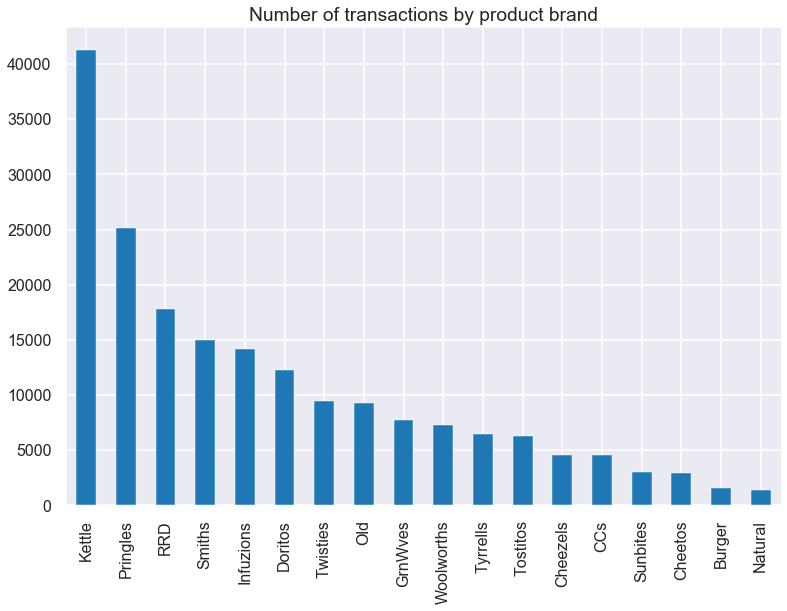

In [277]:
data['PROD_BRAND'].value_counts().plot(kind='bar')
plt.title('Number of transactions by product brand')

**Kettle is the most popular brand**    

### By product price

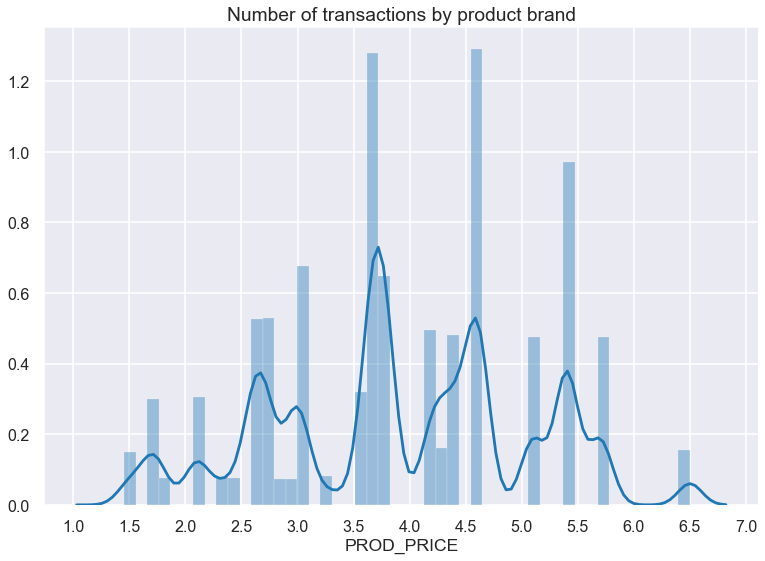

In [291]:
ax=sns.distplot(data['PROD_PRICE'])
plt.title('Number of transactions by product brand')
ax.xaxis.set_major_locator(plt.MaxNLocator(14))

**Product price which ranges from 3.5 to 4 dollars sells better**

### By customer segmentation and attribute

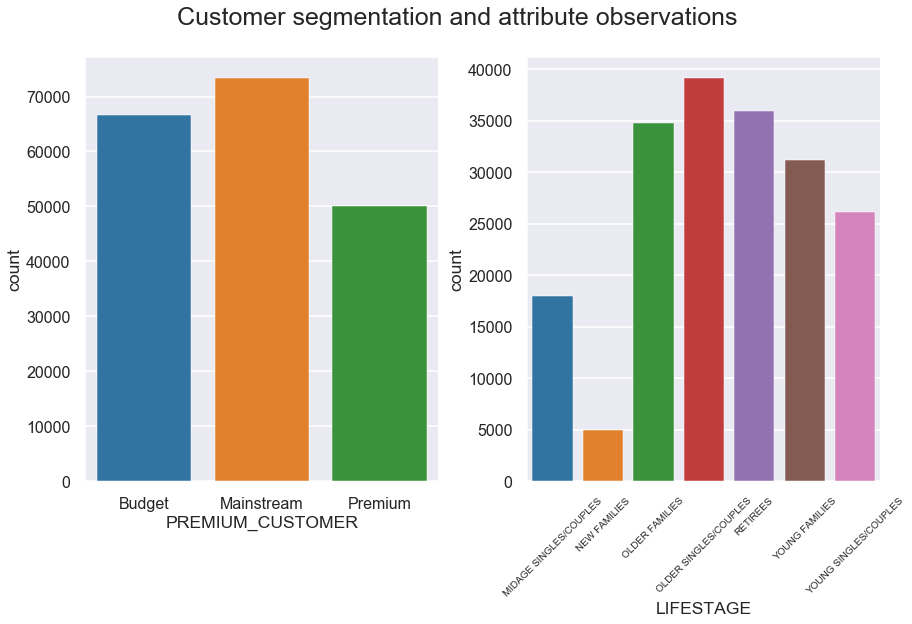

In [251]:
fig,ax =plt.subplots(1,2)
sns.countplot(data['PREMIUM_CUSTOMER'], ax=ax[0])
sns.countplot(data['LIFESTAGE'], ax=ax[1])
ax[1].tick_params(axis='x',labelsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
fig.suptitle('Customer segmentation and attribute observations',fontsize=25)
fig.subplots_adjust(top=0.9)

**There are more mainstream customers than budget and premium cutomers
<br>Older singels/couples is the largest customer group in terms of lifestage** 

In [257]:
totalsales_cust= data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index().sort_values('TOT_SALES', ascending=False)

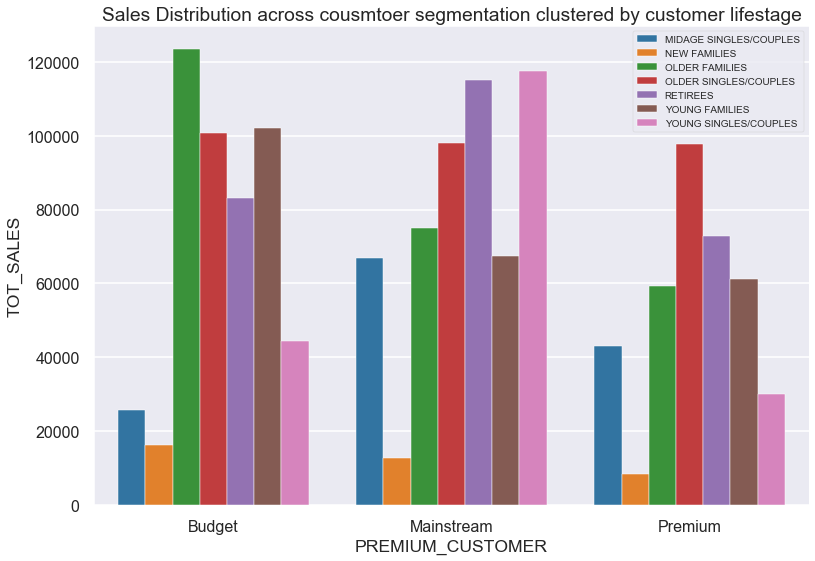

In [274]:
sns.barplot(x='PREMIUM_CUSTOMER',y='TOT_SALES',hue='LIFESTAGE',data = totalsales_cust)
plt.title("Sales Distribution across cousmtoer segmentation clustered by customer lifestage")
plt.legend(fontsize=10)
plt.show()

**Older families buy more budget product
<br>Young singles/couples buy more mainstream product
<br>Older single/couples buy more premium product**